# The Best Neighborhood in Pittsburgh (Base on Number of Swimming Pools)
#### Jeffery He

**As we are Fish Lover, the mental health of the fish is one of the most important parts of what we are picking the best neighborhood. The best way to relax is taking the walks, so which neighborhood have most pool becoming the best neighborhood.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Pool = pd.read_csv("AquaticInspections.csv")
Violations = pd.read_csv("Aquatic_Violations.csv")

## Introduction
**Open the dataset, display all the pool and spa addresses.**

In [2]:
Pool.head(10)

,_id,Inspection ID,Facility ID,Facility Name,Facility Address,Facility Address 2,Facility Municipality Name,Facility City,Facility County,Facility State,...,"pH Value, Deep",Cyanuric Acid,Turnover,Enclosure,Main Drain Visible,Safety Equipment,Disinfectant Level,pH Balance,No Imminent Health Hazards,Abated Date
0,59290,195942,9097,COMFORT INN & SUITES NORTH SHORE - POOL,820 E OHIO STREET,NaN,Pittsburgh,Pittsburgh,Allegheny County,PA,...,NaN,NaN,NaN,t,t,t,t,t,t,2021-10-18
1,59291,195998,1201,MOON HIGH SCHOOL POOL,8353 UNIVERSITY BOULEVARD,NaN,Moon Township,MOON TOWNSHIP,Allegheny County,PA,...,7.4,NaN,725.0,t,t,t,t,t,t,2021-10-25
2,59292,196048,1491,HOMEWOOD SUITES - POOL,2000 GSK DRIVE,NaN,Moon Township,CORAOPOLIS,Allegheny County,PA,...,NaN,NaN,45.0,t,t,t,t,t,t,2022-10-24
3,59293,196160,5142,COMFORT INN & SUITES PITTSBURGH-POOL,1100 BANKSVILLE ROAD,NaN,Pittsburgh,PITTSBURGH,Allegheny County,PA,...,NaN,NaN,NaN,t,t,f,t,f,t,2021-11-24
4,59294,196238,2025,PGH BRASHEAR HIGH SCHOOL - POOL,590 CRANE AVENUE,NaN,Pittsburgh,PITTSBURGH,Allegheny County,PA,...,7.4,NaN,675.0,t,t,t,t,t,t,2021-11-01
5,59295,196275,2456,VIRGINIA MANSIONS CONDO SPA,2120 GREENTREE ROAD,NaN,Scott Township,PITTSBURGH,Allegheny County,PA,...,NaN,NaN,NaN,t,t,t,t,t,t,2021-12-15
6,59296,196315,2325,SHALER ELEMENTARY SCHOOL POOL,700 SCOTT AVENUE,NaN,Shaler Township,GLENSHAW,Allegheny County,PA,...,7.2,NaN,370.0,t,t,t,t,t,t,2021-11-08
7,59297,196339,1456,MT LEBANON SR HIGH POOL,155 COCHRAN ROAD,NaN,Mount Lebanon,PITTSBURGH,Allegheny County,PA,...,7.4,NaN,880.0,t,t,t,t,t,t,2021-11-04
8,59298,196396,2002,JEWISH COMMUNITY CENTER LAP POOL,5738 FORBES AVENUE,NaN,Pittsburgh,PITTSBURGH,Allegheny County,PA,...,7.4,NaN,300.0,t,t,t,t,t,t,2021-11-05
9,59299,196556,678,CHATHAM UNIVERSITY SPA,WOODLAND ROAD,NaN,Pittsburgh,PITTSBURGH,Allegheny County,PA,...,NaN,NaN,NaN,t,t,t,t,t,t,2021-11-10


## Which city have most Pools

In [3]:
types = ['POOLS (INDOOR)', 'POOLS(CONDO OUTDOOR)','POOL (CONDO INDOOR)', 'POOLS(SCHOOL)', 'POOLS(OUTDOOR)']
filtered_data = Pool[Pool['Venue Type'].isin(types)].copy()

filtered_data.loc[:, 'Street'] =  filtered_data['Facility Address'].str.split(n=1).str[1]
##Keep the Street name, split the number and street name, and stored the name in the 'Street'.

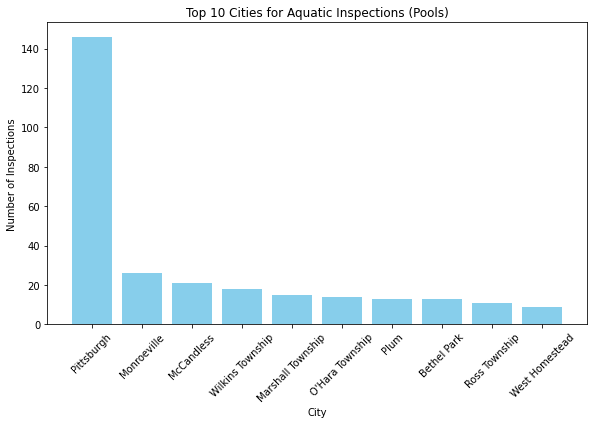

In [4]:
city_counts = filtered_data['Facility Municipality Name'].value_counts()
top_10 = city_counts.head(10)
top_10_df = pd.DataFrame({'City': top_10.index, 'Number of Inspections': top_10.values})
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_df['City'], top_10_df['Number of Inspections'], color='skyblue')
plt.title('Top 10 Cities for Aquatic Inspections (Pools)')
plt.xlabel('City')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
city_counts.head(5)

Pittsburgh           146
Monroeville           26
McCandless            21
Wilkins Township      18
Marshall Township     15
Name: Facility Municipality Name, dtype: int64

**Remove all the data except pools. The bar chart clearly shows that Pittsburgh has the most pools, which is 146 pools in the whole city.**

---

## Which is the best neighborhood
**The dataset is without any information about the neighborhood, only the name of the street, so the best neighborhood will be judged by finding the best street.**

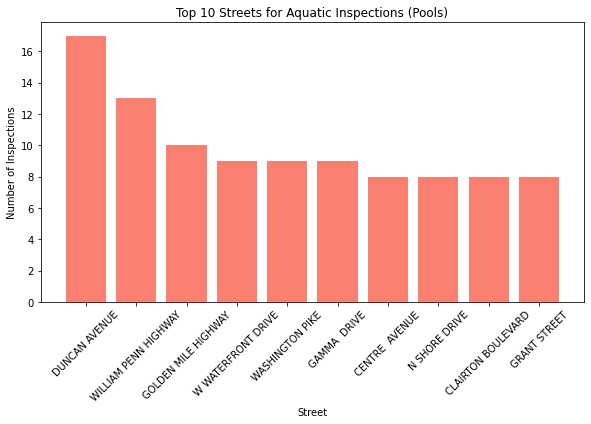

In [6]:
street_counts = filtered_data['Street'].value_counts()
top_streets = street_counts.head(10)
top_streets_df = top_streets.reset_index()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.bar(top_streets_df['index'], top_streets_df['Street'], color='salmon')
plt.title('Top 10 Streets for Aquatic Inspections (Pools)')
plt.xlabel('Street')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 

In [8]:
street_counts.head(5)

DUNCAN AVENUE           17
WILLIAM PENN HIGHWAY    13
GOLDEN MILE HIGHWAY     10
W WATERFRONT DRIVE       9
WASHINGTON PIKE          9
Name: Street, dtype: int64

## Conclusion

**After counting all the streets, DUNCAN AVENUE has the most Pools, and it is located in Allison Park, so Allison Park is the best neighborhood in terms of Pools.**

### ALLISON PARK